# Analisis Exploratorio de los Datos en base a los Dataset obtenidos luego del proceso Web Scraping.

### Se importan las librerías a utilizar para cargar los datasets y la visualización de graficos.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Se cargan los archivos .CSV en DataFrames con codificación UTF-8

In [44]:
hechos =  'datasets/HECHOS.csv'
hechos_victimas = 'datasets/VICTIMAS.csv'
df_hechos = pd.read_csv(hechos, encoding='UTF-8')
df_hechos_victimas = pd.read_csv(hechos_victimas , encoding='UTF-8')

### En esta fase se hace una visualización de los Datasets obtenidos en el proceso de Web Scraping y conocer los datos que serán transformados y cargados en el proceso de ETL.

### Se vizualizan los DataFrames Hechos y Víctimas.

In [45]:
df_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [46]:
df_hechos_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


### Se verifica la estructura y los datos contenidos en los ambos DataFrames.

In [47]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [48]:
df_hechos_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


### Se verifica la distribución y las características estadísticas de los datos en los DataFrames.

In [49]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,3336.635659,7.425287
std,0.179393,1.683754,3.571309,8.639646,3060.641793,4.387050
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


In [50]:
df_hechos_victimas.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


 ##### Luego de analizada la estructura y característica de los DataFrames, se ha identificado que ambos contienen información relevante. Para unificarlos, se propone realizar un merge utilizando las columnas ID e ID_hecho, renombrando esta última como ID. Además, se ha observado que existen columnas redundantes que representan la misma información de manera desglosada. Por lo tanto, se eliminarán las siguientes columnas:
 ##### - En el dataset HECHOS: ‘AAAA’, ‘MM’, ‘DD’, ‘HORA’, ‘XY (CABA)’, ‘PARTICIPANTES’.
 ##### - En el dataset VICTIMAS: ‘AAAA’, ‘MM’, ‘DD’.
 ##### - Estas modificaciones se llevarán a cabo en el notebook ETL.ipynb, descritas y documentadas. 

### En esta fase se hace una descripción gráfica con la finalidad de análizar tendencias, patrones y el comportamiento de los datos luego del proceso de ETL. 

In [57]:
df_final = pd.read_csv('DataSetFinal.csv', encoding='UTF-8')

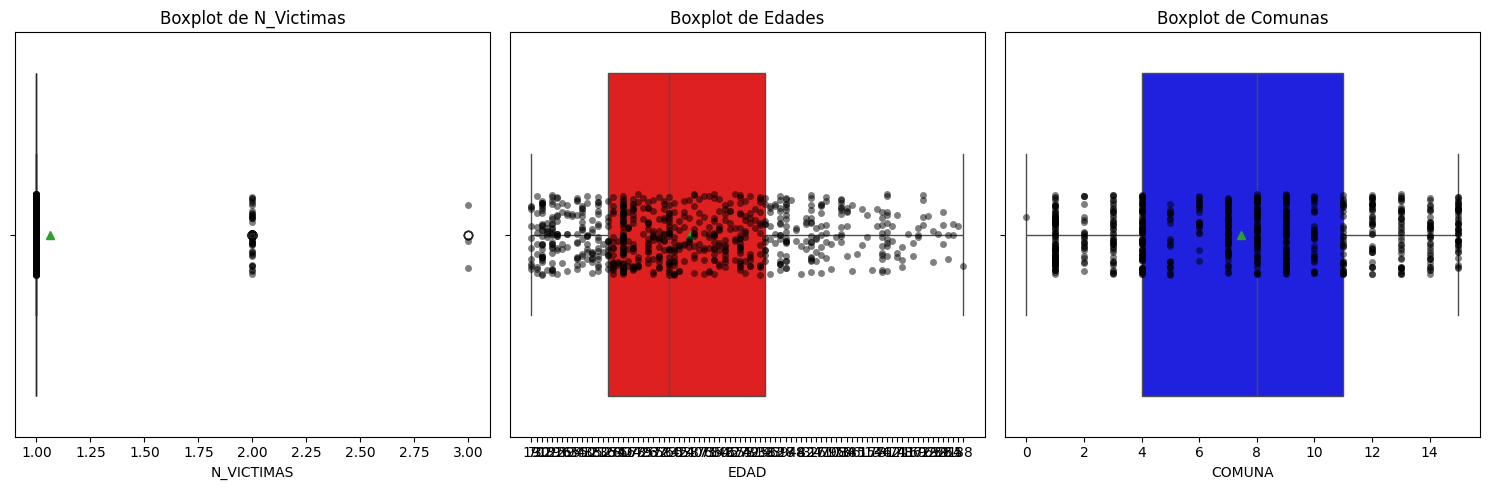

In [58]:
#variables = ['EDAD' y 'COMUNA']
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generar los boxplots para cada variable
sns.boxplot(ax=axes[0], x=df_final['N_VICTIMAS'],  color='green', showfliers=True, showmeans=True)
sns.boxplot(ax=axes[1], x=df_final['EDAD'], color='red', showfliers=True, showmeans=True)
sns.boxplot(ax=axes[2], x=df_final['COMUNA'], color='blue', showfliers=True, showmeans=True)

# Superponer datos originales
sns.stripplot(ax=axes[0], x=df_final['N_VICTIMAS'], color='black', alpha=0.5)
sns.stripplot(ax=axes[1], x=df_final['EDAD'], color='black', alpha=0.5)
sns.stripplot(ax=axes[2], x=df_final['COMUNA'], color='black', alpha=0.5)

# Añadir títulos a los subplots
axes[0].set_title('Boxplot de N_Victimas')
axes[1].set_title('Boxplot de Edades')
axes[2].set_title('Boxplot de Comunas')

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### - El número de víctimas por accidentes es de 1 a 3 víctimas. 
### - Las edades en los niveles de accidentalidad están distribuidas entre los 20 y 80 años, con mayor tendencia entre los 20 y los 40 años de edad. 
### - Mientras que las comunas tienen una distribución uniforme en cada valor del 1 al 15 con mayor tendencia las comunas número 1, 4, 7, 8 y 9.

### Análisis del top 20 de los cruces donde ocurren los sinistrros viales de manera frecuente, víctimas y género. 

C:\Users\58424\AppData\Local\Temp\ipykernel_18636\2776617244.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_20, y='Cruce', order=top_20_cruces, palette='dark')
C:\Users\58424\AppData\Local\Temp\ipykernel_18636\2776617244.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, y='VICTIMA_x', order=orden_victimas, palette='muted')
C:\Users\58424\AppData\Local\Temp\ipykernel_18636\2776617244.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, y='SEXO', palette='pastel')


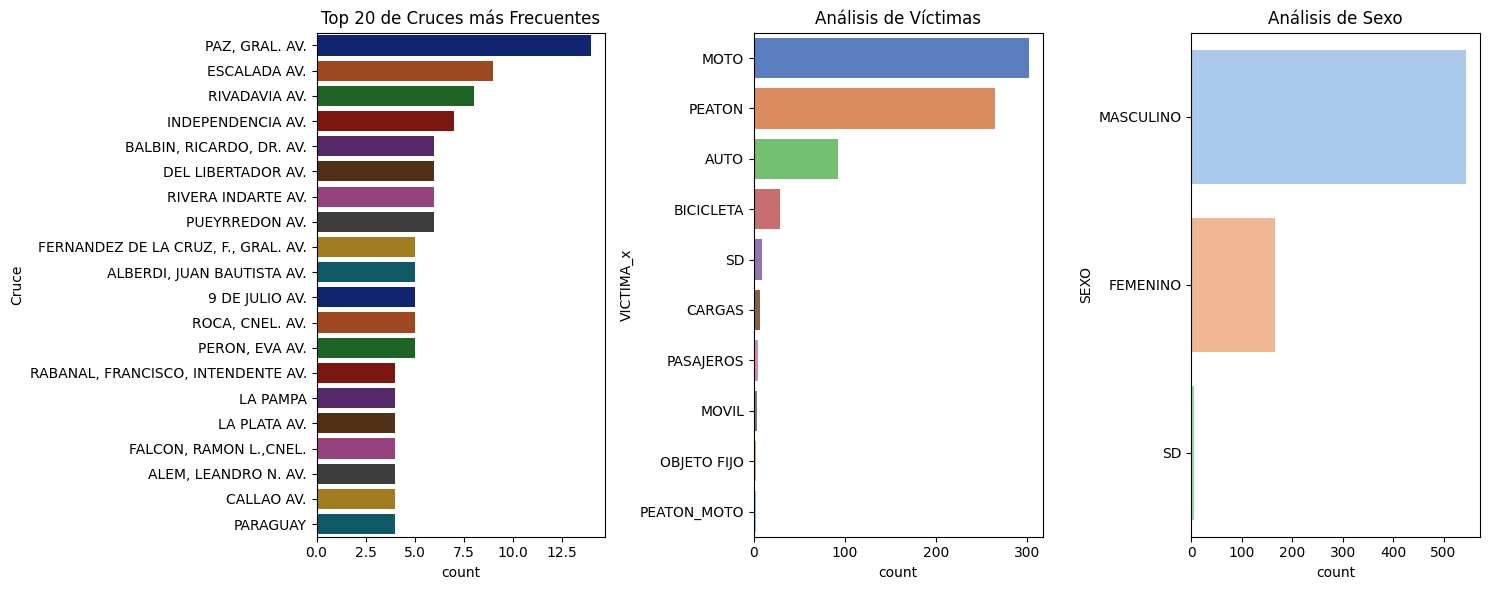

In [59]:
# Obtener los top 20 cruces más frecuentes
top_20_cruces = df_final['Cruce'].value_counts().nlargest(20).index

# Filtrar el DataFrame para incluir solo los top 20 cruces
df_top_20 = df_final[df_final['Cruce'].isin(top_20_cruces)]

# Obtener el orden de frecuencia descendente para 'VICTIMA_x'
orden_victimas = df_final['VICTIMA_x'].value_counts().index

# Crear un gráfico de barras combinado horizontalmente
plt.figure(figsize=(15, 6))

# Cruces más frecuentes
plt.subplot(1, 3, 1)
sns.countplot(data=df_top_20, y='Cruce', order=top_20_cruces, palette='dark')
plt.title('Top 20 de Cruces más Frecuentes')

# Víctimas ordenadas por frecuencia descendente
plt.subplot(1, 3, 2)
sns.countplot(data=df_final, y='VICTIMA_x', order=orden_victimas, palette='muted')
plt.title('Análisis de Víctimas')

# Sexo
plt.subplot(1, 3, 3)
sns.countplot(data=df_final, y='SEXO', palette='pastel')
plt.title('Análisis de Sexo')

plt.tight_layout()
plt.show()

### Gráfico de Dispersión de las Víctimas por Edad

C:\Users\58424\AppData\Local\Temp\ipykernel_18636\990674462.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_final, x='VICTIMA_x', y='EDAD', palette='dark')


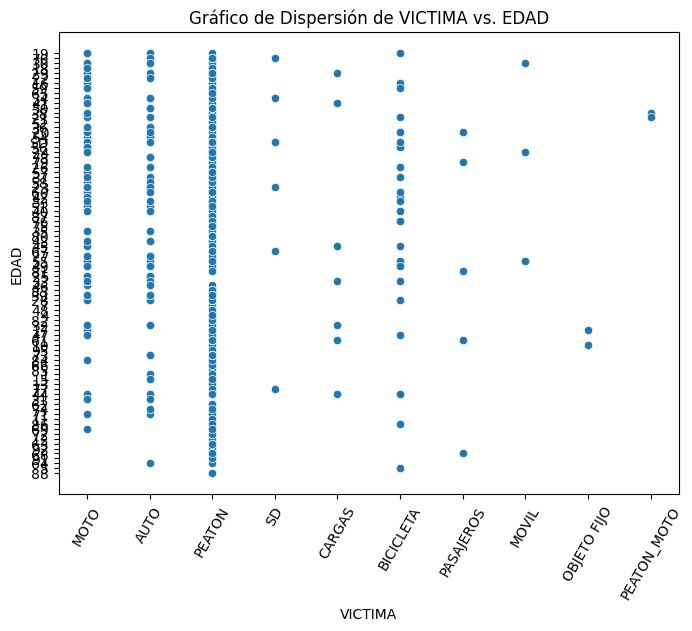

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x='VICTIMA_x', y='EDAD', palette='dark')
plt.title('Gráfico de Dispersión de VICTIMA vs. EDAD')
plt.xlabel('VICTIMA')
plt.ylabel('EDAD')
plt.xticks(rotation=60)

plt.show()

## Análisis Bivariado y Multivariado

### Gráfico de Dispersión de las Víctimas por Edad / Víctimas por Sexo.

C:\Users\58424\AppData\Local\Temp\ipykernel_18636\1881950022.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_final, x='VICTIMA_x', y='EDAD', palette='muted', ax=axes[0])
C:\Users\58424\AppData\Local\Temp\ipykernel_18636\1881950022.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_final, x='VICTIMA_x', y='SEXO', palette='pastel', ax=axes[1])


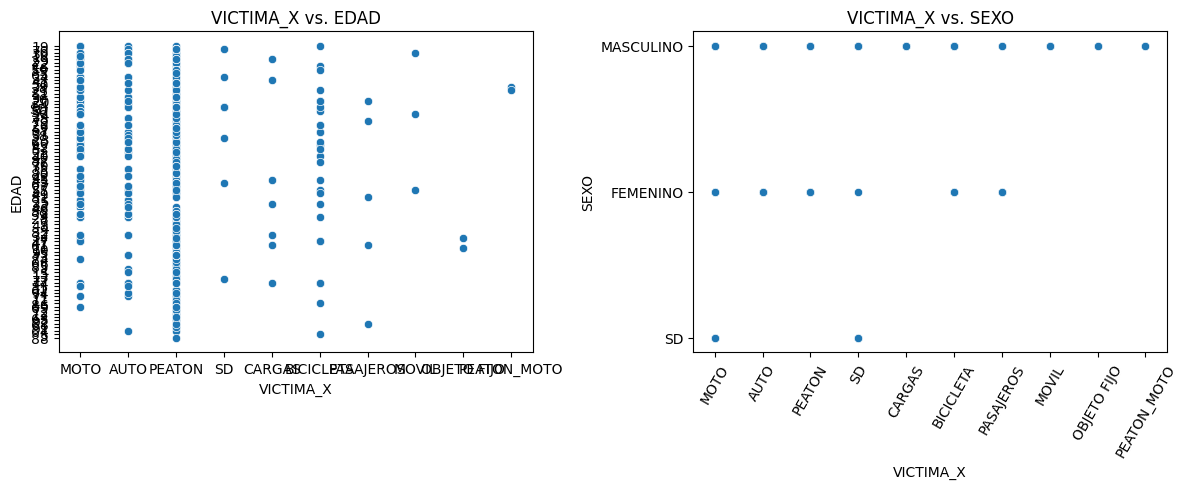

In [61]:
# Crear un gráfico de dispersión para VICTIMA_X y EDAD
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de dispersión de VICTIMA_X vs. EDAD
sns.scatterplot(data=df_final, x='VICTIMA_x', y='EDAD', palette='muted', ax=axes[0])
axes[0].set_title('VICTIMA_X vs. EDAD')
axes[0].set_xlabel('VICTIMA_X')
axes[0].set_ylabel('EDAD')

# Gráfico de dispersión de VICTIMA_X vs. SEXO
sns.scatterplot(data=df_final, x='VICTIMA_x', y='SEXO', palette='pastel', ax=axes[1])
axes[1].set_title('VICTIMA_X vs. SEXO')
axes[1].set_xlabel('VICTIMA_X')
axes[1].set_ylabel('SEXO')

plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### Creación del Mapa de Correlación de las variables.

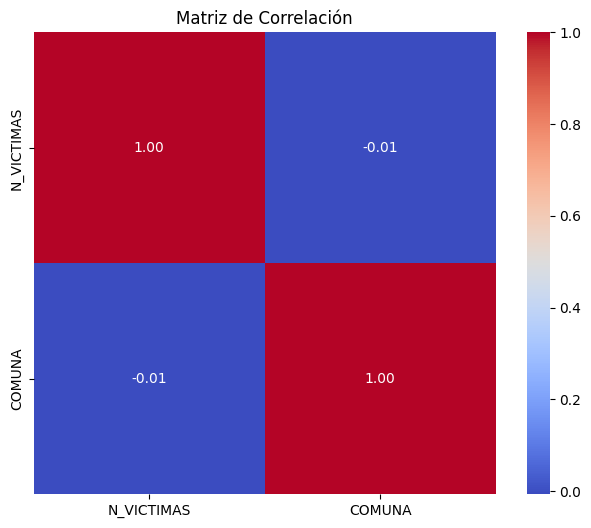

In [64]:
# Seleccionar solo las variables numéricas
df_numeric = df_final.select_dtypes(include=['int64','float64'])

# Calcular el índice de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()